## Análisis Exploratorio

In [1]:
# Importación de Librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

%matplotlib inline
pd.set_option('display.max_columns', 30)
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [2]:
# Datos Tabulares
train = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')

In [3]:
train.shape # dimensiones del dataset

(14993, 24)

In [4]:
train.head() 

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


### Variables categoricas

PetID - ID 

AdoptionSpeed - target variable

Type - 1 = Cat, 2 = Dog

Name - Nombre de la mascota

Breed1 - Codificación de raza primaria

Breed2 - Codificación de raza secundaria

Gender - 1 =male, 2 = female, 3 = mixed (used for groups)

Color1 - Codificación de color primario

Color2 - Codificación de color secundario

Color3 - Codificación de color terciario

MaturitySize - 1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified

FurLength - 1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified

Vaccinated - 1= Yes, 2 = No, 3 = Not Sure

Dewormed - 1 = Yes, 2 = No, 3 = Not Sure

Sterilized - 1 = Yes, 2 = No, 3 = Not Sure

Health - 1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified

State - ugar donde se encuentra publicada la mascota

RescuerID - ID

Description - Texto que describe a la mascota




### Variables numéricas

Age - Edad en meses

Quantity - Cantidad de mascotas en una única publicación

Fee - Precio

VideoAmt - Cantidad de videos asosciados a la publicación 

PhotoAmt - Cantidad de imágenes asosciados a la publicación

### AdoptionSpeed: conteo

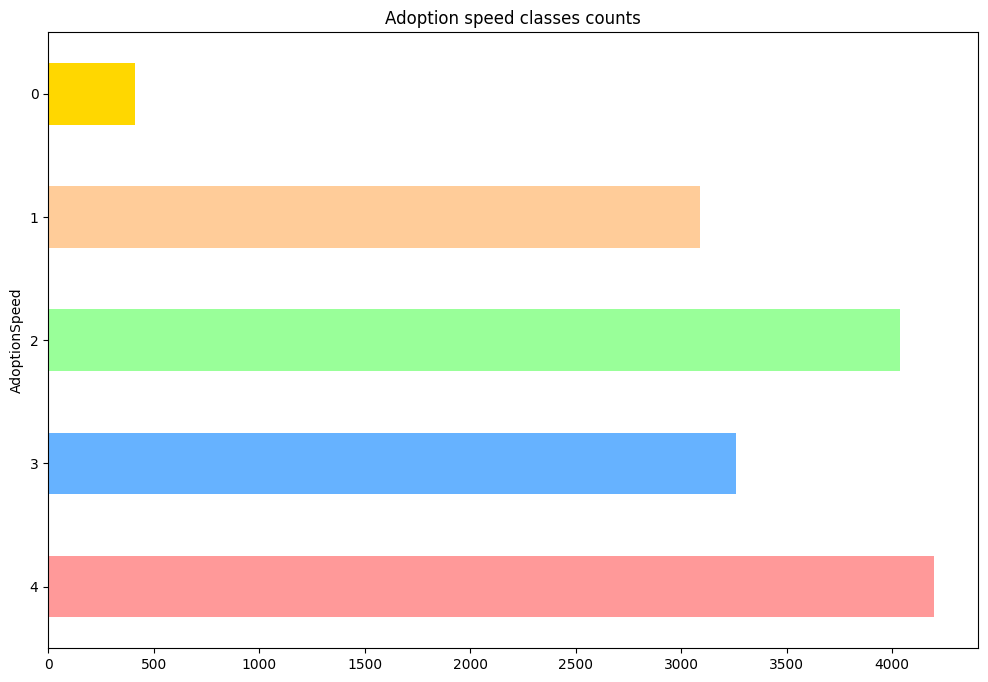

In [5]:
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']
train['AdoptionSpeed'].value_counts().sort_index(ascending=False).plot(kind='barh', color=colors);
plt.title('Adoption speed classes counts');

Son muy pocas las mascotas que se adoptan en el día. La clase predominante es la 4 (sin adopción tras 100 días).

### Tipo de mascota: perro o gato

In [6]:
# Mapeamos el Tipo de Mascota
train['Type'] = train['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')

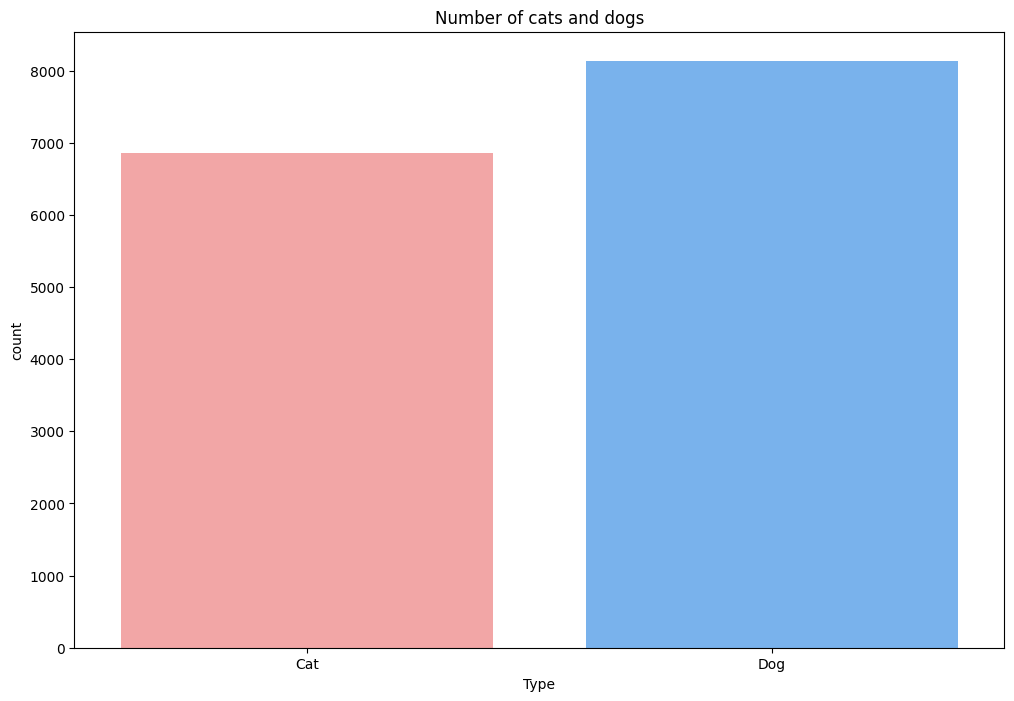

In [7]:
sns.countplot(x='Type', data=train, hue='Type', palette=colors[:2])
plt.title('Number of cats and dogs')
plt.show()

El dataset contiene aproximadamente un 15% más de registros de perros que de gatos.

### AdoptionSpeed según tipo de mascota

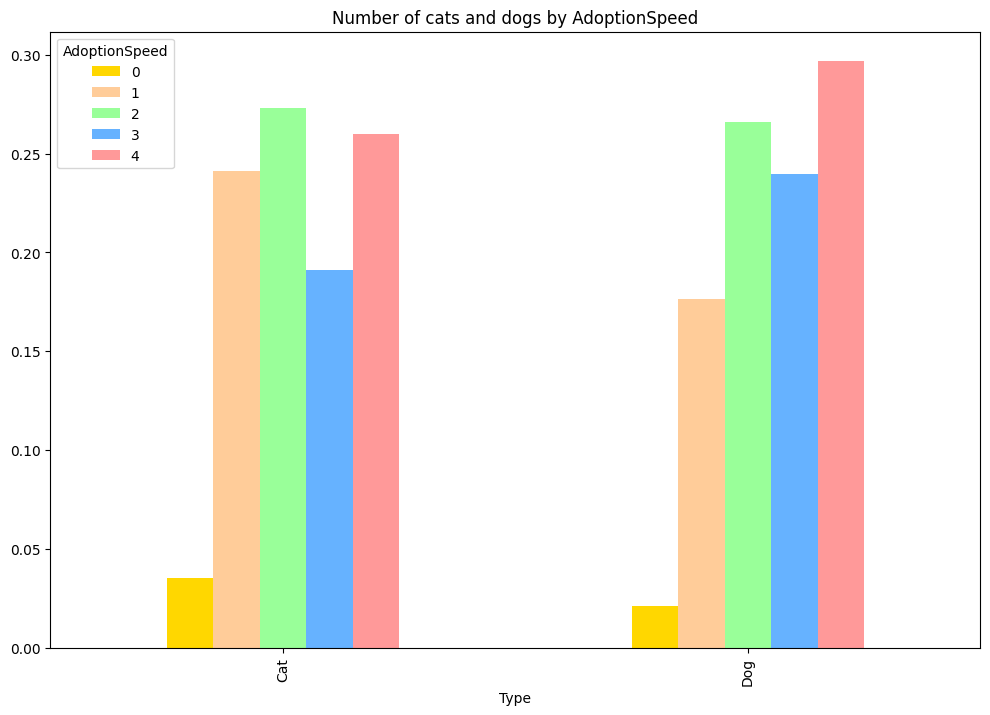

In [8]:
cross = pd.crosstab(train['Type'], train['AdoptionSpeed'], normalize='index')
cross.plot.bar(color=colors[::-1])

plt.title('Number of cats and dogs by AdoptionSpeed')
plt.show()

Las velocidades de adopción 0 y 1 (las más rápidas) son relativamente más frecuentes en gatos.

Las velocidades de adopción 3 y 4 (las más lentas) son relativamente más frecuentes en perros.

### Nombres más comunes

In [9]:
train.Name.value_counts()

Name
Baby                      66
Lucky                     64
No Name                   54
Brownie                   54
Mimi                      52
                          ..
Maroo                      1
4 PUPPIES FOR ADOPTION     1
Trish                      1
Lab Mix Puppy 2            1
Fili                       1
Name: count, Length: 9059, dtype: int64

El cuarto nombre más común es "No Name", lo cual en realidad corresponde a no tener nombre.

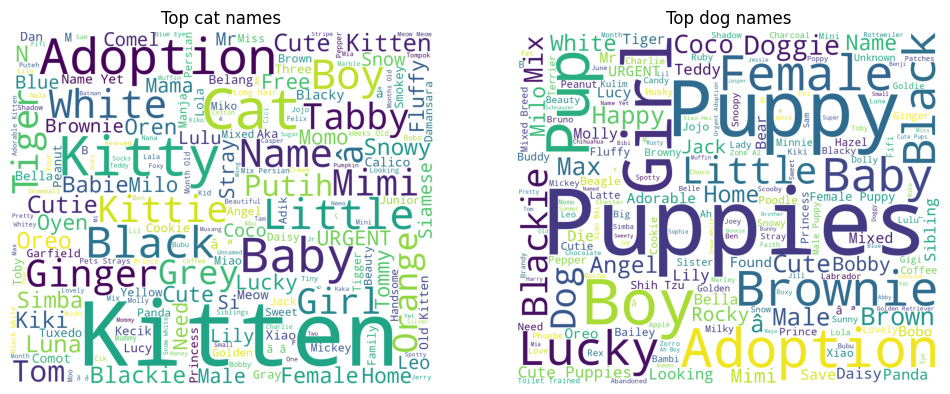

In [10]:
plt.subplot(1, 2, 1)
text_cat = ' '.join(train.loc[train['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(train.loc[train['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

Nuevamente se ve que algunos los nombres más comunes en realidad corresponden a descripciones de la publicación y no a verdaderos nombres.

### AdoptionSpeed según si la mascota tiene nombre

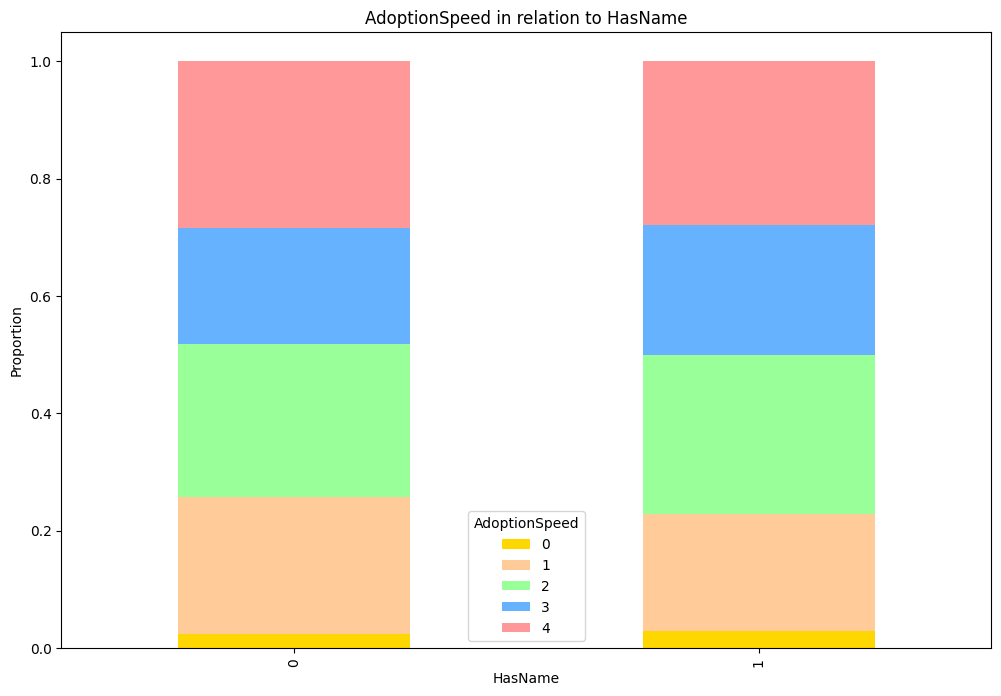

In [11]:
# AdoptionSpeed en relacion a Has_name -- las barras suman 100% por cada valor de Has_name

unknown_names = 'name|puppies|kitten|puppy|unknown'
train['Name'] = np.where(train['Name'].str.lower().str.contains(unknown_names), np.nan, train['Name'])
train['Name'] = np.where(train['Name'].str.len() < 3, np.nan, train['Name'])
train['HasName'] = train['Name'].apply(lambda x: 0 if pd.isnull(x) else 1)

# train['Name'] = train['Name'].fillna('Unnamed')
# train['Has_name'] = 1
# train.loc[train['Name'] == 'Unnamed', 'Has_name'] = 0

cross = pd.crosstab(train['HasName'], train['AdoptionSpeed'], normalize='index')
cross.plot.bar(stacked=True, color=colors[::-1])
plt.title('AdoptionSpeed in relation to HasName')
plt.xlabel('HasName')
plt.ylabel('Proportion')
plt.legend(title='AdoptionSpeed')
plt.show()

La clase 4 es la mayoritaría tanto para las mascotas con nombre como las que no tienen nombre.

No se observa una clara tendencia en la velocidad de adoptción en relación al nombre

### Edades de las mascotas

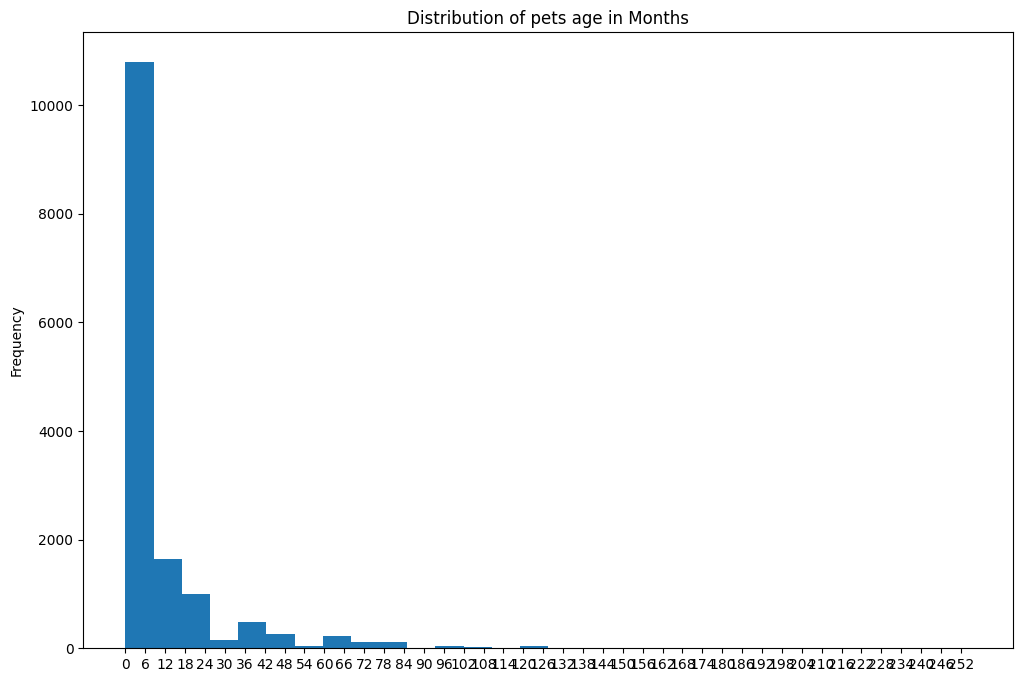

In [12]:
train['Age'].plot(kind='hist', bins=30, density=False)
plt.title('Distribution of pets age in Months')
plt.xticks(range(0, int(train['Age'].max()) + 1, 6))
plt.show()


La mayoría de las mascotas tienen menos de 6 meses y muy pocas tienen mas de 24 meses

### Nulos

In [13]:
# Check the amount of null values
train.isnull().sum()


Type                0
Name             2807
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        13
PetID               0
PhotoAmt            0
AdoptionSpeed       0
HasName             0
dtype: int64

Solo 'Description' tiene nulos

### PhotoAmt vs AdoptionSpeed

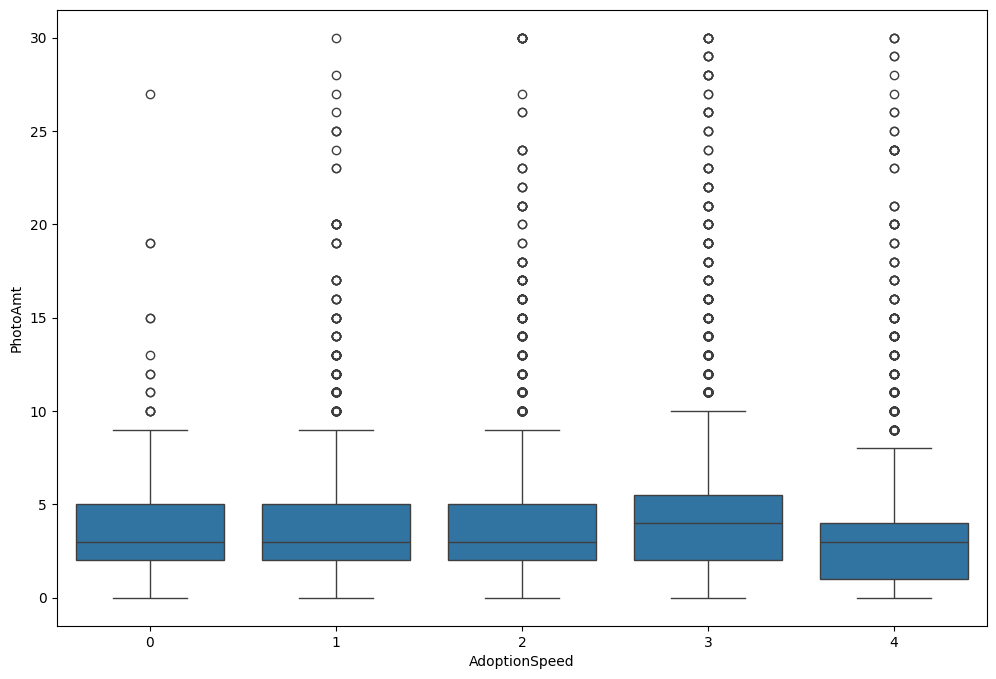

In [14]:
sns.boxplot(data=train, x="AdoptionSpeed", y="PhotoAmt")
plt.show()

La mayor distinción se da entre la caja 4 y las demás: los animales con pocas fotos son adoptados más lentamente.

### Fee vs AdoptionSpeed

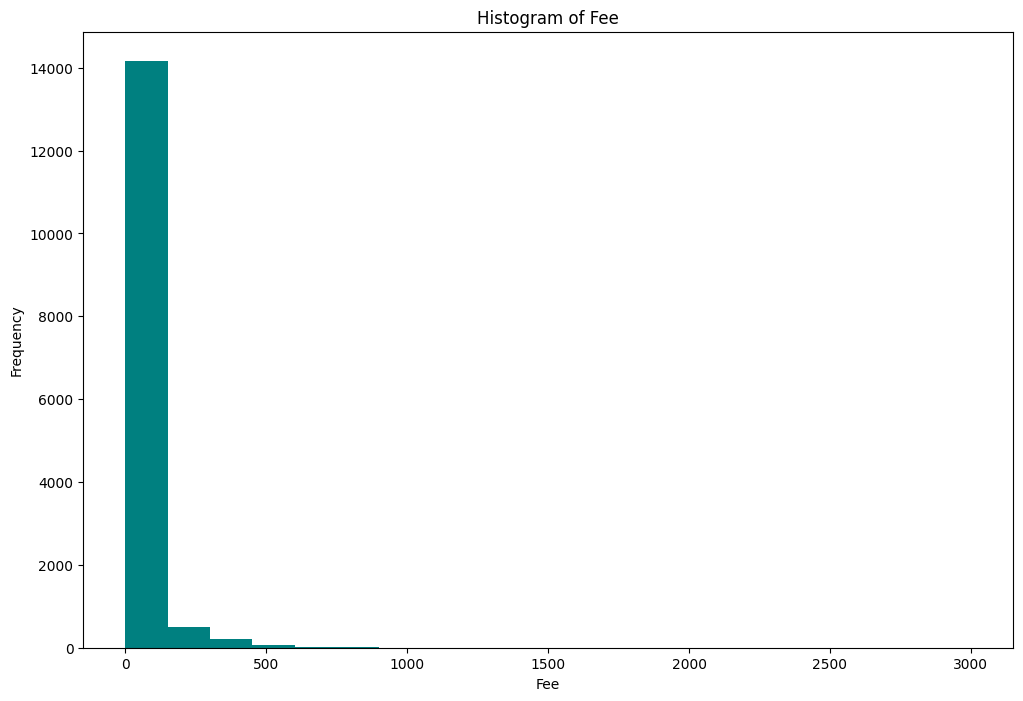

In [15]:
plt.hist(train['Fee'], bins=20, color='teal')
plt.title('Histogram of Fee')
plt.xlabel('Fee')
plt.ylabel('Frequency')
plt.show()

La gran mayoría de los animales publicados no tienen tarifa.

### AdoptionSpeed según vacunación

In [16]:
train['Vaccinated'] = train['Vaccinated'].apply(lambda x: 'Yes' if x == 1 else 'No' if x == 2 else 'Not sure')

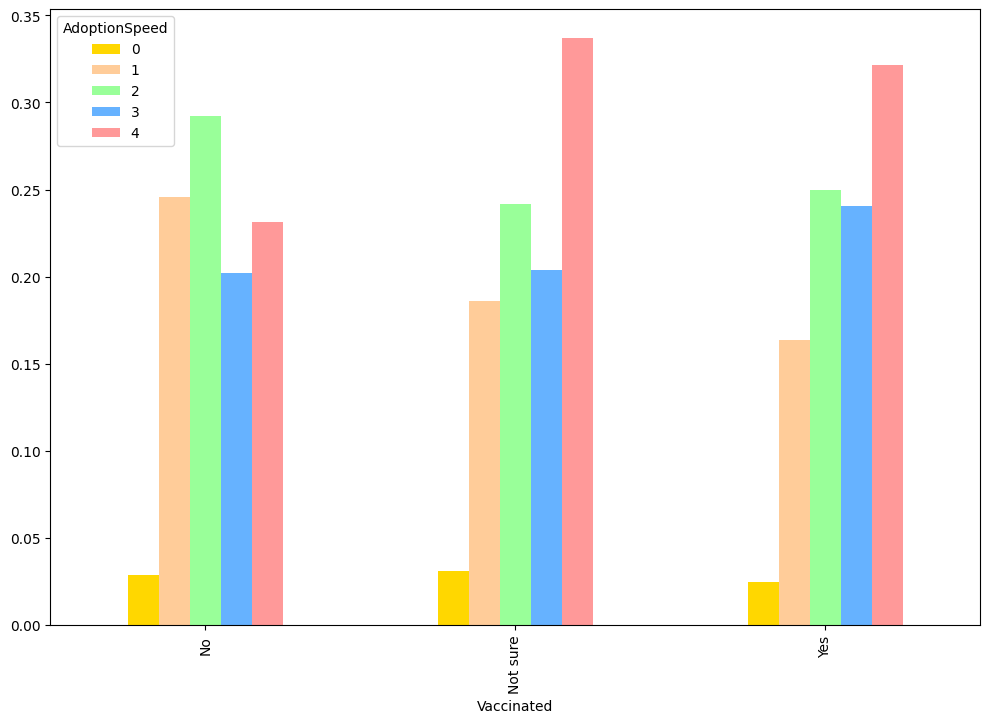

In [17]:
cross = pd.crosstab(train['Vaccinated'], train['AdoptionSpeed'], normalize='index')
cross.plot.bar(color=colors[::-1])
plt.show()

Para los posibles estados de vacunación, es la categoría 'Not sure' donde mayor predominancia tiene la clase 4.

Es posible que el desconocimiento desaliente a los usuarios: quisieran una mascota vacunada pero no pueden vacunarla porque quizás ya fue vacunada en el pasado.

### AdoptionSpeed según desparasitación

In [18]:
train['Dewormed'] = train['Dewormed'].apply(lambda x: 'Yes' if x == 1 else 'No' if x == 2 else 'Not sure')

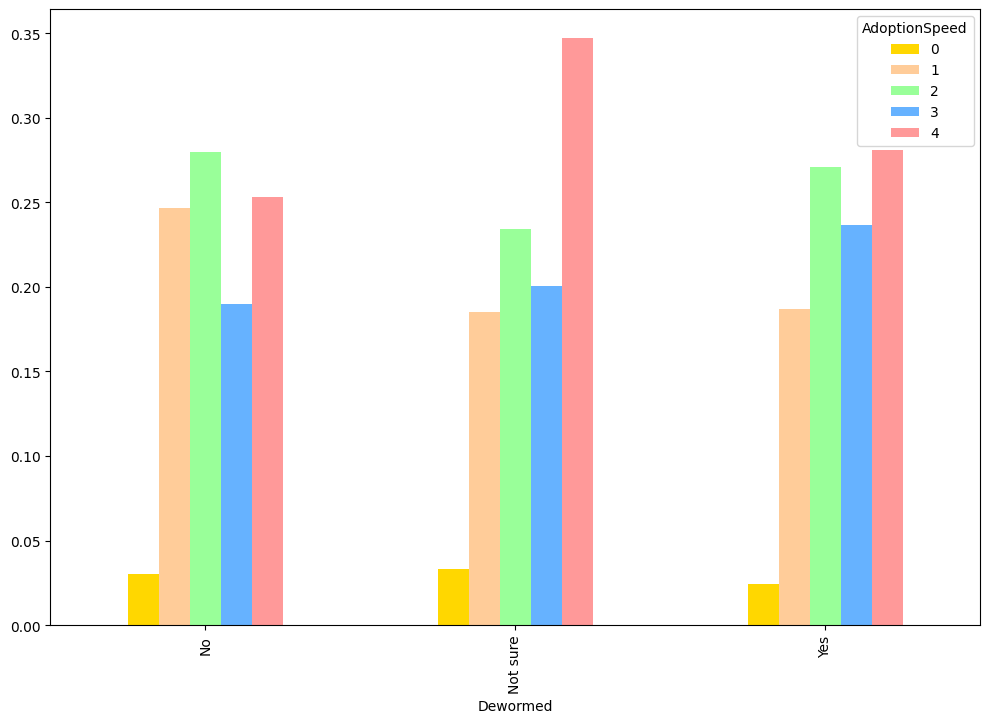

In [19]:
cross = pd.crosstab(train['Dewormed'], train['AdoptionSpeed'], normalize='index')
cross.plot.bar(color=colors[::-1])
plt.show()

Comportamiento similar a la variable 'Vaccinated', esta vez más acentuado.

### AdoptionSpeed según esterilización

In [20]:
train['Sterilized'] = train['Sterilized'].apply(lambda x: 'Yes' if x == 1 else 'No' if x == 2 else 'Not sure')

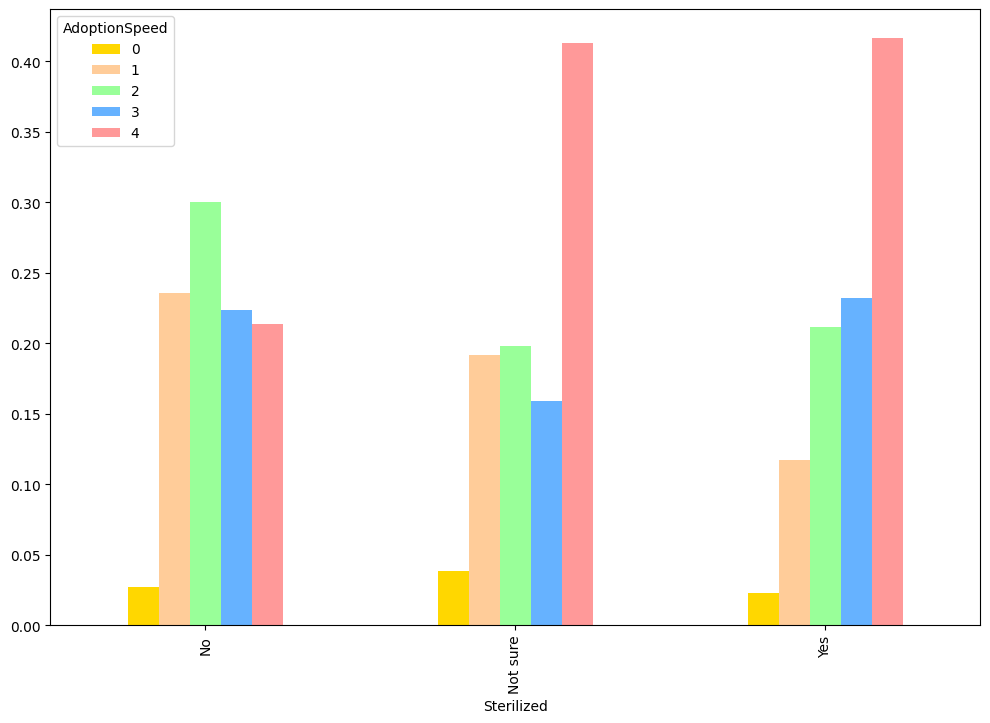

In [21]:
cross = pd.crosstab(train['Sterilized'], train['AdoptionSpeed'], normalize='index')
cross.plot.bar(color=colors[::-1])
plt.show()

Las mascotas no esterilizadas tienden a ser adoptadas más rápido.

Esto podría deberse a que los usuarios no quieren mascotas esterilizadas o bien prefieren esterilizarlas por su cuenta a la edad apropiada, para evitar inconvenientes de salud.

### Razas más velozmente adoptadas

In [22]:
# Filter the dataframe for dogs
dog_df = train[(train['Type'] == 'Dog') & (train['Breed1'] != 307)]

# Group the dataframe by AdoptionSpeed and Breed1, and count the occurrences
grouped_df = dog_df.groupby(['AdoptionSpeed', 'Breed1']).size().reset_index(name='Count')

# Sort the dataframe by AdoptionSpeed and Count in descending order
sorted_df = grouped_df.sort_values(['AdoptionSpeed', 'Count'], ascending=[True, False])

# Get the top 3 breeds for each AdoptionSpeed
top_3_breeds = sorted_df.head(3)


In [23]:
top_3_breeds_unique = top_3_breeds['Breed1'].unique()
df_breeds = pd.read_csv('../input/petfinder-adoption-prediction/breed_labels.csv')
df_breeds[df_breeds['BreedID'].isin(top_3_breeds_unique)]

,BreedID,Type,BreedName
108,109,1,Golden Retriever
178,179,1,Poodle
204,205,1,Shih Tzu


Las razas de perro más velozmente adoptadas concuerdan con las razas más populares (fuente: https://www.forbes.com/advisor/pet-insurance/pet-care/popular-dog-breeds/).

In [24]:
# Filter the dataframe for cats
#cat_df = train[train['Type'] == 'Cat']
cat_df = train[(train['Type'] == 'Cat') & (train['Breed1'] != 264)& (train['Breed1'] != 265)& (train['Breed1'] != 266)]

# Group the dataframe by AdoptionSpeed and Breed1, and count the occurrences
grouped_df2 = cat_df.groupby(['AdoptionSpeed', 'Breed1']).size().reset_index(name='Count')

# Sort the dataframe by AdoptionSpeed and Count in descending order
sorted_df2 = grouped_df2.sort_values(['AdoptionSpeed', 'Count'], ascending=[True, False])

# Get the top 3 breeds for each AdoptionSpeed
top_3_breeds2 = sorted_df2.head(3)

In [25]:
top_3_breeds_unique2 = top_3_breeds2['Breed1'].unique()
df_breeds[df_breeds['BreedID'].isin(top_3_breeds_unique2)]

,BreedID,Type,BreedName
285,285,2,Persian
292,292,2,Siamese
299,299,2,Tabby


Las razas de gato que mas rápido se adoptan son Persas, Siameses y Tabby

### AdoptionSpeed según State

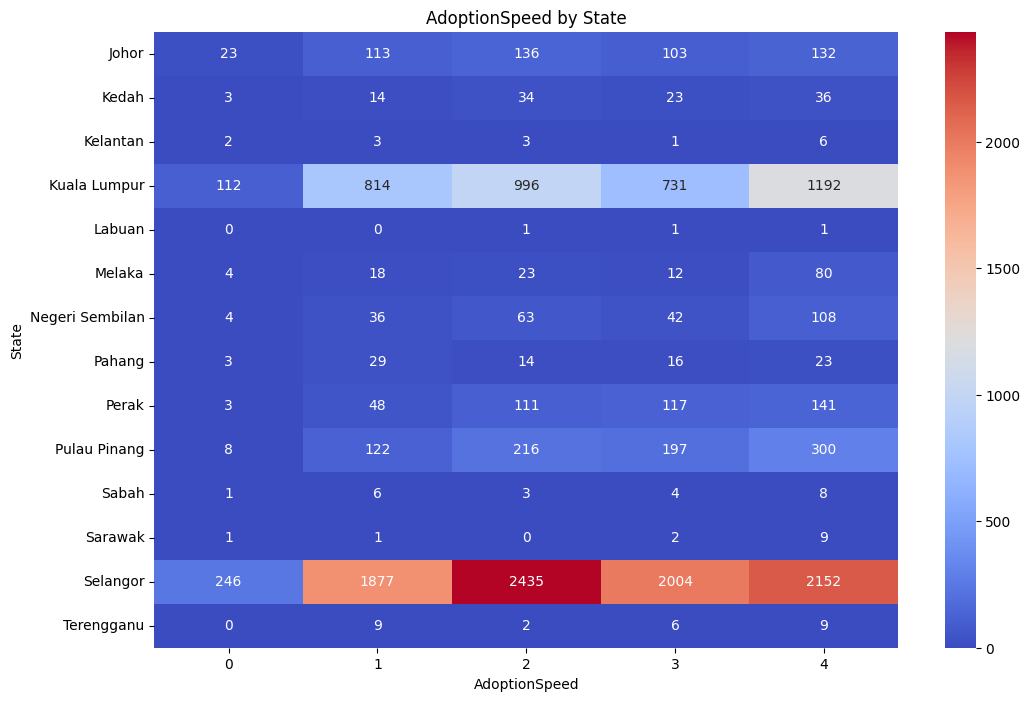

In [26]:
# Reemplazar State por su nombre usando el diccionario state_labels.csv
states = pd.read_csv('../input/petfinder-adoption-prediction/state_labels.csv')
states_dict = {k: v for k, v in zip(states['StateID'], states['StateName'])}
train['State'] = train['State'].apply(lambda x: states_dict[x] if x in states_dict else '')

# Heatmap cruzando State y AdoptionSpeed
cross = pd.crosstab(train['State'], train['AdoptionSpeed'])
sns.heatmap(cross, cmap='coolwarm', annot=True, fmt='d')
plt.title('AdoptionSpeed by State')
plt.show()

Puede verse que Selangor es el estado donde más mascotas son publicadas. La clase predominante en este estado es la 2 (adopción en menos de un mes).

En segundo puesto está Kuala Lumpur. Allí la clase más frecuente es la 4 (sin adopción tras 100 días).

### Cantidad de mascotas esterilizadas/vacunadas/desparasitadas según su edad

El siguiente análisis se hizo para poner a prueba la hipótesis de que las mascotas menores a cierta edad no eran sometidas a estos tratamientos.

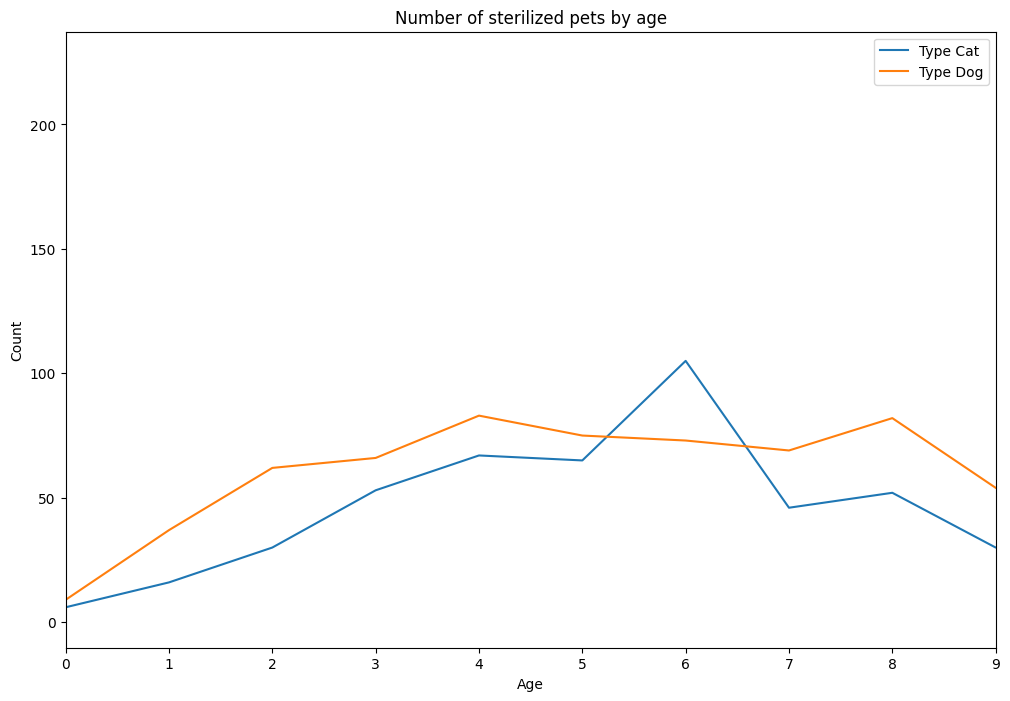

In [27]:
import matplotlib.pyplot as plt

# Filter the dataframe for Sterilized
sterilized_df = train[train['Sterilized'] == 'Yes']

# Group the dataframe by Type and Age, and count the occurrences
grouped_df = sterilized_df.groupby(['Type', 'Age']).size().reset_index(name='Count')

# Create a plot for each Type
for t in grouped_df['Type'].unique():
    type_df = grouped_df[grouped_df['Type'] == t]
    plt.plot(type_df['Age'], type_df['Count'], label=f'Type {t}')
    plt.xlim(0, 9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of sterilized pets by age')
plt.legend()
plt.show()

La edad en la que los veterinarios de nuestro país recomiendo esterilizar es a partir de los 5 o seis meses pero se observa que para las mascotas del dataset, este procedimiento se hace a edades menores

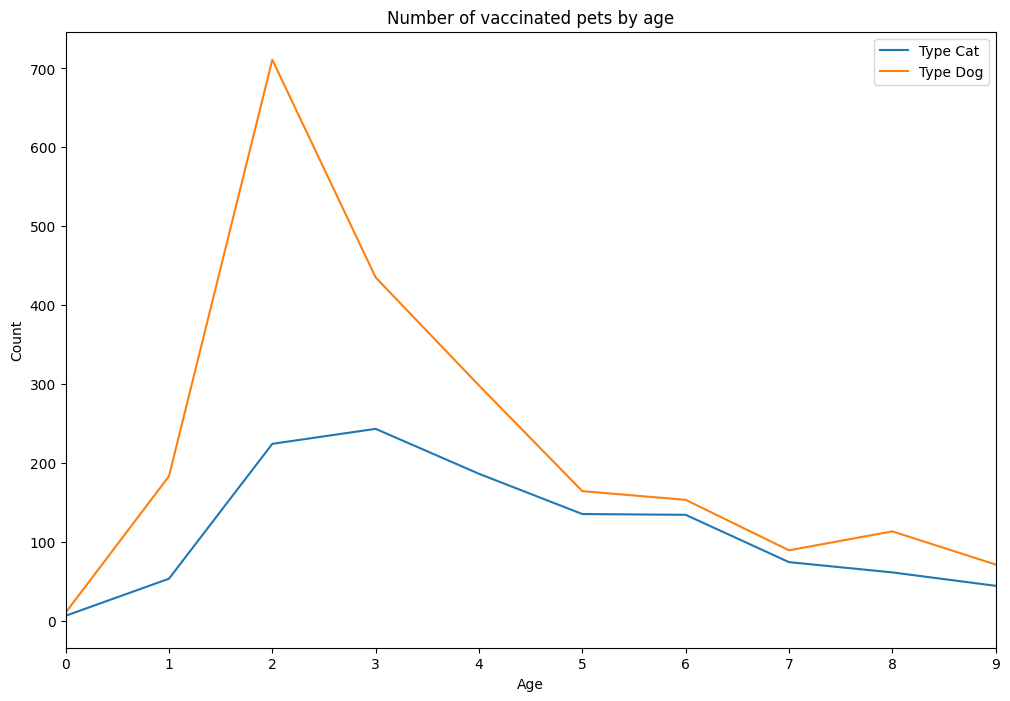

In [28]:
import matplotlib.pyplot as plt

# Filter the dataframe for Vaccinated
vaccinated_df = train[train['Vaccinated'] == 'Yes']

# Group the dataframe by Type and Age, and count the occurrences
grouped_df = vaccinated_df.groupby(['Type', 'Age']).size().reset_index(name='Count')

# Create a plot for each Type
for t in grouped_df['Type'].unique():
    type_df = grouped_df[grouped_df['Type'] == t]
    plt.plot(type_df['Age'], type_df['Count'], label=f'Type {t}')
    plt.xlim(0, 9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of vaccinated pets by age')
plt.legend()
plt.show()

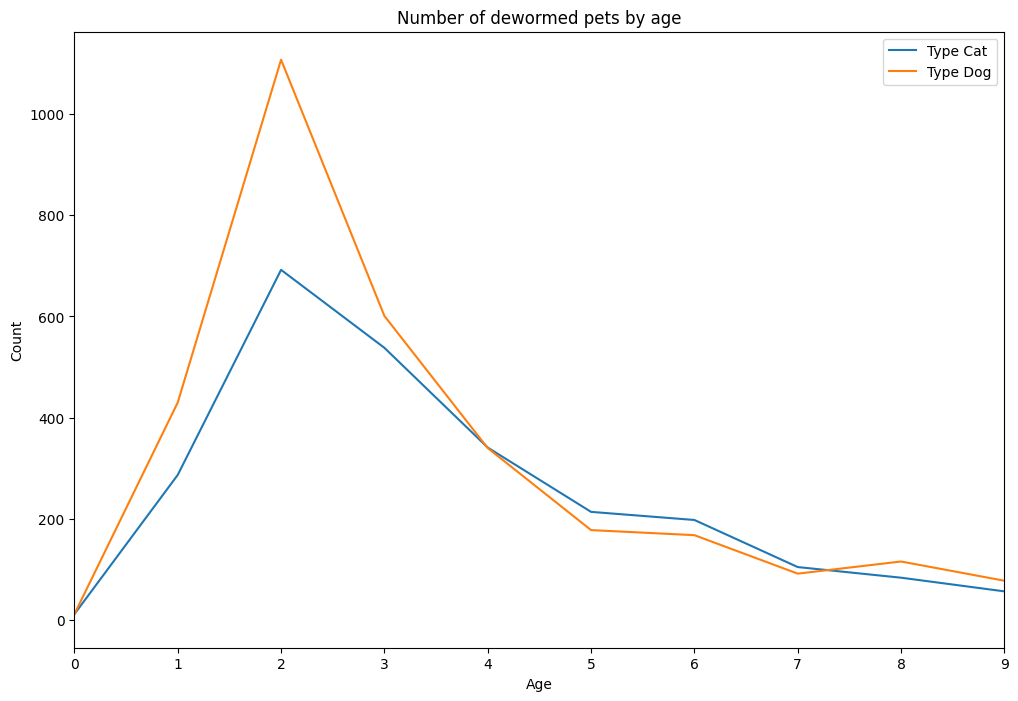

In [29]:
import matplotlib.pyplot as plt

# Filter the dataframe for Dewormed
dewormed_df = train[train['Dewormed'] == 'Yes']

# Group the dataframe by Type and Age, and count the occurrences
grouped_df = dewormed_df.groupby(['Type', 'Age']).size().reset_index(name='Count')

# Create a plot for each Type
for t in grouped_df['Type'].unique():
    type_df = grouped_df[grouped_df['Type'] == t]
    plt.plot(type_df['Age'], type_df['Count'], label=f'Type {t}')
    plt.xlim(0, 9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of dewormed pets by age')
plt.legend()
plt.show()

A partir de los 2 meses es cuando se hacen la mayor cantidad de vacunaciones y desparacitaciones